# Central Limit Theorem and Sampling

## Central Limit Theorem (CLT)

The **Central Limit Theorem** states that, under certain conditions,  
the sampling distribution of the sample mean approaches a normal distribution  
as the sample size $n$ becomes large, regardless of the shape of the population distribution.

### Formal Statement:
Let $X_1, X_2, ..., X_n$ be i.i.d. random variables with:
- Mean: $\mu$
- Variance: $\sigma^2 < \infty$

Then the standardized sample mean:
$$
Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}
$$
converges in distribution to the standard normal $N(0,1)$ as $n \to \infty$.

---

## Key Points:
- Works for most real-world distributions, as long as they have **finite variance**.
- Explains why the **normal distribution** appears so often in statistics.
- Important for **confidence intervals** and **hypothesis testing**.

---

## Sampling
Sampling is the process of selecting a subset (sample) from a population to estimate population characteristics.
- **Random Sampling** ensures each member has an equal chance of selection.
- **Sampling Distribution** is the distribution of a statistic over repeated samples.


In [14]:
set.seed(42)

# Population: Exponential distribution (not normal)
population <- rexp(100000, rate = 1)  # mean = 1, variance = 1

# Function to generate sample means
generate_sample_means <- function(sample_size, num_samples) {
  replicate(num_samples, mean(sample(population, sample_size)))
}

In [15]:
# Different sample sizes
sample_sizes <- c(5, 30, 100)
num_samples <- 5000

# Generate and store sample means
means_list <- lapply(sample_sizes, generate_sample_means, num_samples = num_samples)

In [16]:
# Print summary stats
for (i in seq_along(sample_sizes)) {
  cat("Sample size:", sample_sizes[i], "\n")
  print(summary(means_list[[i]]))
  cat("\n")
}

Sample size: 5 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09853 0.66447 0.92857 0.99225 1.24647 3.54704 

Sample size: 30 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4449  0.8719  0.9876  1.0000  1.1200  1.7566 

Sample size: 100 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6998  0.9293  0.9933  0.9977  1.0630  1.3881 



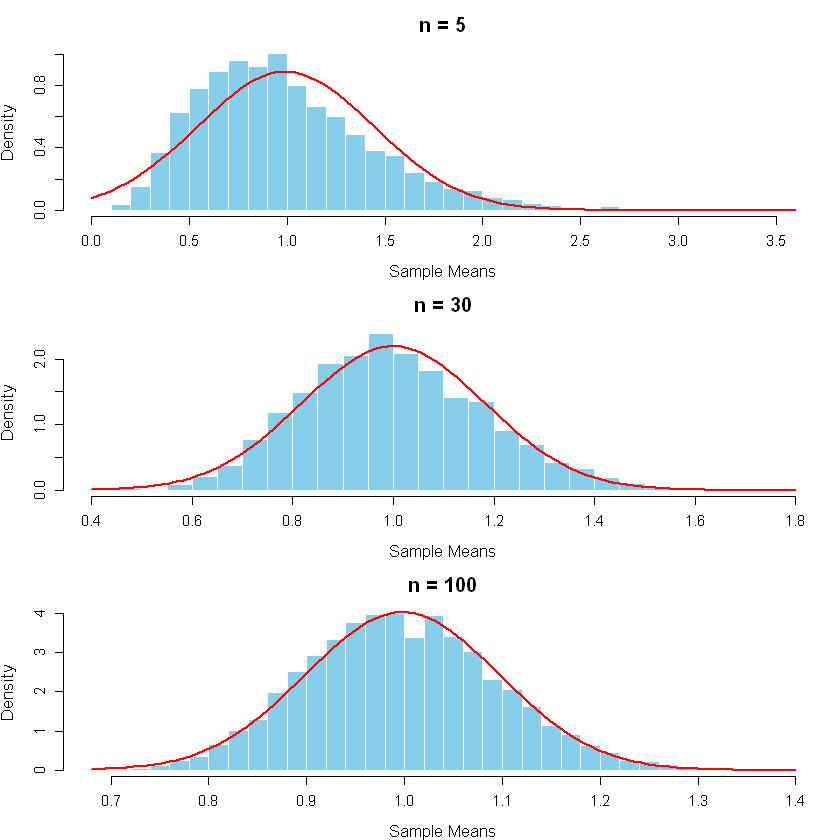

In [17]:
# Plot histograms to see CLT in action
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", pch = 19,
    mfrow = c(3,1), mar = c(4,4,3,1)) 
for (i in seq_along(sample_sizes)) {
  hist(means_list[[i]], breaks = 30, probability = TRUE, col = "skyblue",
       main = paste("n =", sample_sizes[i]),
       xlab = "Sample Means", border = "white",
       cex.main = 1.5, cex.lab = 1.3, cex.axis = 1.1)
  
  # Overlay normal curve with same mean & sd
  curve(dnorm(x, mean = mean(means_list[[i]]), sd = sd(means_list[[i]])),
        col = "red", lwd = 2, add = TRUE)
}

# Interpretation

- For **n = 5**, the sampling distribution is still skewed, reflecting the exponential population.
- For **n = 30**, the shape is closer to normal.
- For **n = 100**, the distribution of sample means is nearly perfectly normal.

This illustrates the CLT: **As sample size increases, the distribution of the sample mean becomes approximately normal**, regardless of the original population distribution.

---

# Real-World Analogy

Think of measuring the average height of students from different classes:
- Small class (n = 5): Average height varies a lot, distribution is irregular.
- Large class (n = 100): Averages cluster tightly around the true population mean and form a bell curve.
